### RetroAchievements Set Design Poll

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
RA_COLORS = ['#CE9900', '#1065DF']

data = pd.read_csv('01-processed.csv').convert_dtypes()
data.shape

(880, 31)

**December 2024**: A [questionaire](https://docs.google.com/forms/d/e/1FAIpQLSdT88hDwBK0vydvxdccMpKPnaUy0kuA-gOzNjmxhj-jDFUWPw/viewform?usp=header) was provided to site users of [RetroAchievements.org](https://retroachievements.org/), asking various questions about set design philosophy and what they were looking for in an ideal RA set. An impressive 880 responses were collected.

is_player 853
is_dev 98
is_volunteer 31


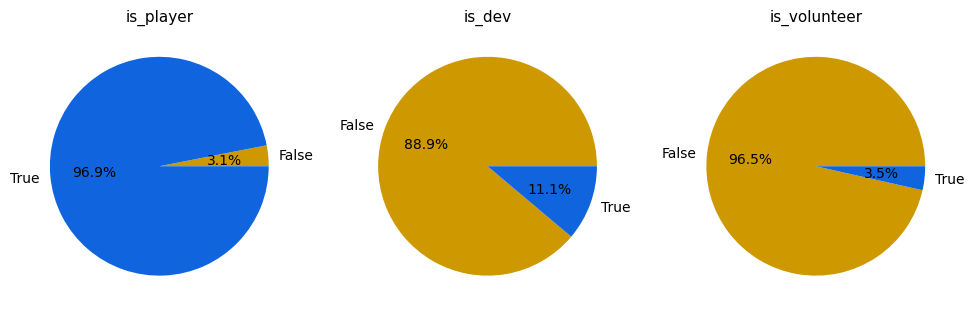

In [3]:
fig, axes = plt.subplots(1, 3)
for ax, type in zip(axes.flat, ['is_player', 'is_dev', 'is_volunteer']):
	g = data[type].value_counts()
	print(type, g[True])
	g.sort_index().plot.pie(y='count', autopct='%.1f%%', colors=RA_COLORS, figsize=(12,12), ax=ax)
	ax.set_title(type, fontsize=11)
	ax.set_ylabel('')

Respondants were asked to self-identify as
- players, people who play sets on RetroAchievements
  - 96.9% players vs 3.1% non-players
- developers, people who made sets on RetroAchievements
  - 11.1% devs vs 88.9% non-devs
- volunteers, people who worked for administrative teams at RetroAchievements
  - 3.5% volunteers vs 96.5% non-volunteers

72


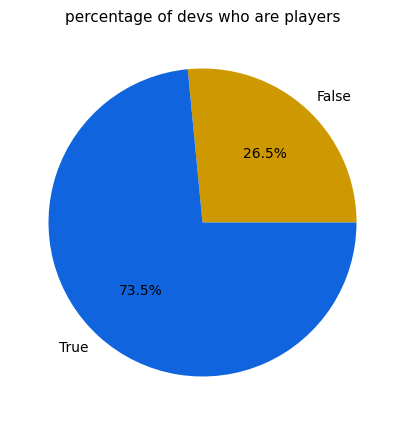

In [4]:
fig, ax = plt.subplots()
g = data[data.is_dev == True].is_player.value_counts()
print(g[True])
g.sort_index().plot.pie(y='count', autopct='%.1f%%', colors=RA_COLORS, figsize=(5,5), ax=ax)
ax.set_title('percentage of devs who are players', fontsize=11)
ax.set_ylabel('')
plt.show()

An interesting, but unimportant, piece of data: of 98 devs who responded to the poll, only 72 (73.5%) consider themselves to be players as well.

count       876.0
mean     3.167808
std      0.605057
min           1.0
25%           3.0
50%           3.0
75%           4.0
max           4.0
Name: how_focused_on_mastery, dtype: Float64
how_focused_on_mastery
1     12
2     63
3    567
4    234
Name: count, dtype: Int64


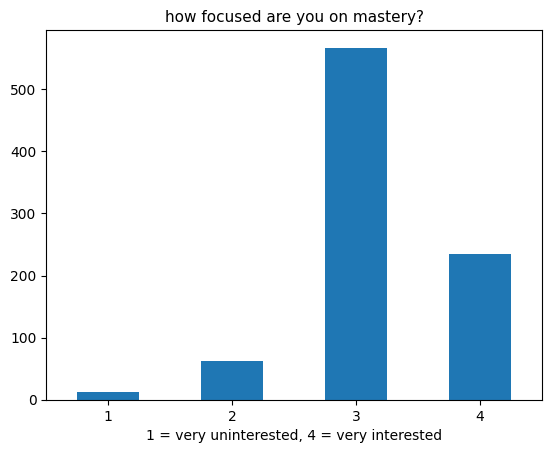

In [5]:
mastery_values = data[data.how_focused_on_mastery != 0].how_focused_on_mastery
print(mastery_values.describe())
print(mastery_values.value_counts().sort_index())

fig, ax = plt.subplots()
mastery_values.value_counts().sort_index().plot.bar(rot=0, ax=ax)
ax.set_title('how focused are you on mastery?', fontsize=11)
ax.set_xlabel('1 = very uninterested, 4 = very interested')
ax.set_ylabel('')
plt.show()

Players were asked to choose an option that best describes their attitude regarding set mastery. Some respondants provided the feedback that the questionnaire lacked answers that fully captured their opinions. The provided options were:

- I play RA sets specifically for mastery, and will often complete challenges that I don't find fun in order to complete the set
- I play RA sets specifically for mastery, but I will stop short if I find myself not having fun with certain challenges
- I don't pay much attention to RA, but I will occasionally look at the RA set to see if there are any challenges that I want to try
- I don't pay much attention to RA, and I don't change my playstyle with regards to the RA achievement set. I earn whatever achievements I earn
- I am not a player.

Disregarding respondants who didn't consider themselves players, the remaining options were reduced to a simple 1-4 scale, with 4 being the first option, indicating a high degree of dedication toward mastery, and 1 being the lowest option, indicating indifference toward mastery.

There is probably not a lot to conclude from this graph, due to [participation bias](https://en.wikipedia.org/wiki/Participation_bias): the sort of user who is not invested in RA enough to care about mastery also is unlikely to have responded to the questionnaire in the first place.

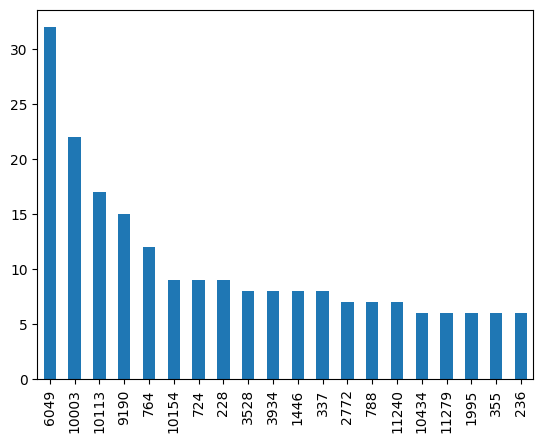

In [6]:
s = pd.Series(sum((z.split(',') for z in data.best_sets.dropna().values), []))
s.value_counts().head(n=20).plot(kind='bar')
plt.show()

The top 5 sets named as favorite sets were as follows:
1. [Super Mario Sunshine (GameCube)](https://retroachievements.org/game/6049) [33]
2. [Super Mario 64 (Nintendo 64)](https://retroachievements.org/game/10003) [22]
3. [The Legend of Zelda: Ocarina of Time (Nintendo 64)](https://retroachievements.org/game/10113) [17]
4. [The Legend of Zelda: The Wind Waker (GameCube)](https://retroachievements.org/game/9190) [15]
5. [Final Fantasy V: Advance (Game Boy Advance)](https://retroachievements.org/game/764) [12]

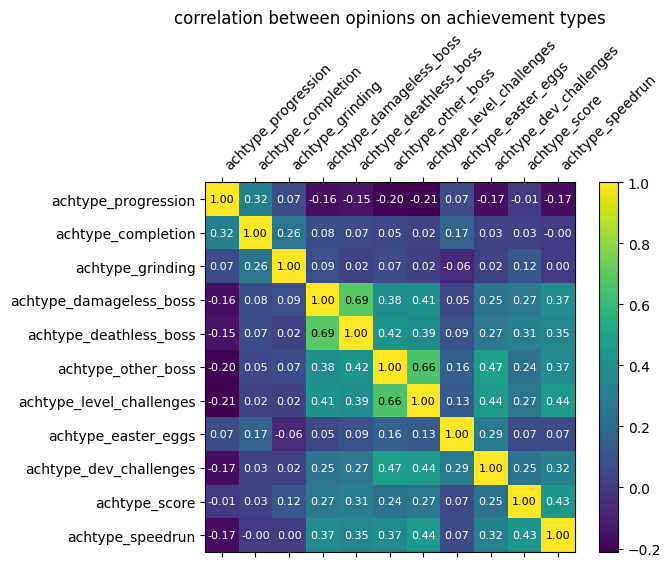

In [34]:
ACH_TYPES = [
	'achtype_progression', # Standard Progression & Milestones
	'achtype_completion', # Completion (100%, collectables, all stages/missions)
	'achtype_grinding', # Grinding / Hyper-Completion (reach level 99, collect every drop, reach 1000 kills with every weapon, etc)
	'achtype_damageless_boss', # Damageless Boss Challenges
	'achtype_deathless_boss', # Deathless Boss Challenges
	'achtype_other_boss', # Other Boss Challenges (weapon restrictions, party restrictions, etc)
	'achtype_level_challenges', # Level Challenges (no powerups, don't press left, no jumping, etc)
	'achtype_easter_eggs', # Easter Eggs (highlighting one-off points of interest in a game, intended by the game developers)
	'achtype_dev_challenges', # Developer-Created Challenges (highlighting one-off points of interest in a game, NOT intended by the game developers)
	'achtype_score', # Score Challenges
	'achtype_speedrun', # Speedrun Challenges
]

fig, ax = plt.subplots()
corr = data[ACH_TYPES].corr()
cax = ax.matshow(corr)
fig.colorbar(cax)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        v = corr.iloc[i, j]
        plt.text(j, i, f'{v:.2f}', ha='center', va='center', 
            color='black' if v > 0.6 else 'white', fontsize=8)

ax.set_title('correlation between opinions on achievement types')
ax.set_yticks(range(len(ACH_TYPES)))
ax.set_xticks(range(len(ACH_TYPES)))
ax.set_yticklabels(ACH_TYPES)
ax.set_xticklabels(ACH_TYPES, rotation=45, ha='left')
plt.show()

The above colormap shows how well-correlated users' responses were regarding their preferences for achievement type. High correlation indicates users rating them as relatively similar in importance, down the lowest values actually indicating a (perhaps statistically-insignificant) negative correlation, meaning users rated them as being inversely important.

The highest correlations are between
- "deathless boss challenges" vs "damageless boss challenges" (69% correlation)
- "creative boss challenges" vs "creative level challenges" (66% correlation)

These correlations feel like they make sense, since they are fundamentally similar.